# Financial Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("FinancialData.csv",encoding='ISO-8859-1')

In [3]:
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [4]:
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'statement'})

In [5]:
df.head()

,sentiment,statement
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [6]:
df.shape

(4845, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   statement  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [8]:
df.describe()

,sentiment,statement
count,4845,4845
unique,3,4837
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2878,2


In [9]:
df.drop_duplicates(subset=['statement'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4837 non-null   object
 1   statement  4837 non-null   object
dtypes: object(2)
memory usage: 113.4+ KB


In [10]:
df.describe()

,sentiment,statement
count,4837,4837
unique,3,4837
top,neutral,Technopolis plans to develop in stages an area...
freq,2871,1


In [11]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


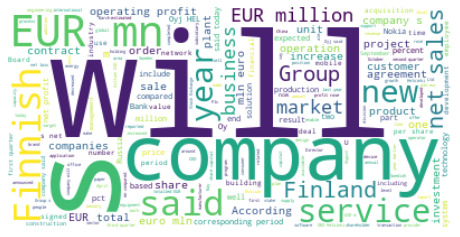

In [12]:
from wordcloud import WordCloud
text = " ".join([x for x in df.statement])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

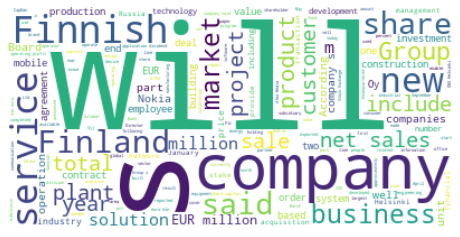

In [13]:
text = " ".join([x for x in df.statement[df.sentiment=='neutral']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

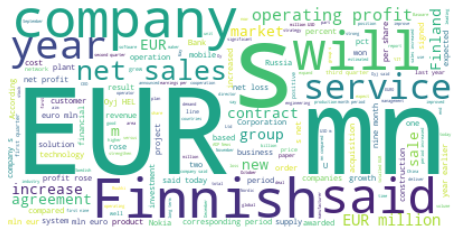

In [14]:
## for positive

text = " ".join([x for x in df.statement[df.sentiment=='positive']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

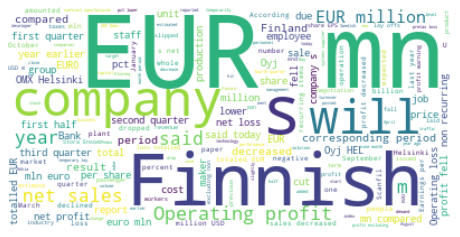

In [15]:
## for negative

text = " ".join([x for x in df.statement[df.sentiment=='negative']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

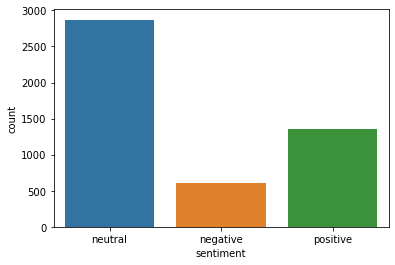

In [16]:
sns.countplot(df.sentiment)

In [17]:
df['sentiment'].value_counts()

neutral     2871
positive    1362
negative     604
Name: sentiment, dtype: int64

In [18]:
train,eva = train_test_split(df,test_size = 0.2)

In [19]:
!pip install simpletransformers

Defaulting to user installation because normal site-packages is not writeable


In [20]:
!pip install torchvision 

Defaulting to user installation because normal site-packages is not writeable


In [21]:
from simpletransformers.classification import ClassificationModel


# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [22]:
# 0,1,2 : positive,negative
def making_label(st):
    if(st=='positive'):
        return 0
    elif(st=='neutral'):
        return 2
    else:
        return 1
    
train['label'] = train['sentiment'].apply(making_label)
eva['label'] = eva['sentiment'].apply(making_label)
print(train.shape)

(3869, 3)


In [23]:
train_df = pd.DataFrame({
    'text': train['statement'][:1500].replace(r'\n', ' ', regex=True),
    'label': train['label'][:1500]
})

eval_df = pd.DataFrame({
    'text': eva['statement'][-400:].replace(r'\n', ' ', regex=True),
    'label': eva['label'][-400:]
})

In [24]:
model.train_model(train_df)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\simpletransformers\classification\classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/188 [00:00<?, ?it/s]

(188, 0.6582570032791254)

In [25]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\simpletransformers\classification\classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/50 [00:00<?, ?it/s]

# Model Evaluation

In [26]:
result

{'mcc': 0.728884994524084, 'eval_loss': 0.46656061679124833}

In [27]:
model_outputs

array([[-0.27171052,  0.80182582, -0.56103921],
       [-0.55091566, -1.57943308,  1.79268193],
       [-0.87641573, -2.41972828,  2.69772172],
       ...,
       [-0.65760839, -2.54211068,  2.73715234],
       [ 1.98979115, -1.34430647, -0.53717244],
       [ 0.40543738, -2.38443756,  1.71992922]])

In [28]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [29]:
true = eval_df['label'].tolist()
predicted = lst

In [30]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[ 96,   2,  23],
       [  6,  35,   6],
       [ 16,   7, 209]], dtype=int64)

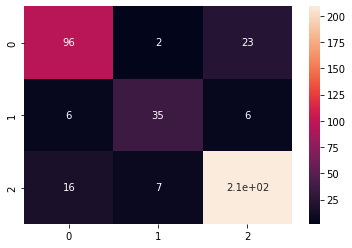

In [31]:
df_cm = pd.DataFrame(mat, range(3), range(3))

sns.heatmap(df_cm, annot=True) 
plt.show()

In [32]:
sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative'])

'              precision    recall  f1-score   support\n\n    positive       0.81      0.79      0.80       121\n     neutral       0.80      0.74      0.77        47\n    negative       0.88      0.90      0.89       232\n\n    accuracy                           0.85       400\n   macro avg       0.83      0.81      0.82       400\nweighted avg       0.85      0.85      0.85       400\n'

In [33]:
sklearn.metrics.accuracy_score(true,predicted)

0.85

# Give your statement

In [34]:
def get_result(statement):
    result = model.predict([statement])
    pos = np.where(result[1][0] == np.amax(result[1][0]))
    pos = int(pos[0])
    sentiment_dict = {0:'positive',1:'negative',2:'neutral'}
    print(sentiment_dict[pos])
    return

In [35]:
## neutral statement
get_result("According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

neutral


In [36]:
## positive statement
get_result("According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

positive


In [37]:
## negative statement
get_result('Sales in Finland decreased by 2.0 % , and international sales decreased by 9.3 % in terms of euros , and by 15.1 % in terms of local currencies .')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

negative


In [38]:
statement = "Give your statement"
get_result(statement)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

neutral
